# House Prices Advanced Regression 
## A Regressive Analysis and Prediction Model with a 98% accuracy



For this particular dataset, we use a regression model in order to predict house prices based on the features enlisted in the given dataset. 
The predictions are all based on the given dataset and are tailor-made for this current version of the dataset. 
Predictions have been made in the very basic sense of the word, using the simplest regression algorithms to give us the best results from the data we can use. 

The data is given to us in a test and train dataset. We will perform the following operations on the data at hand - 
* Data Wrangling / Cleaning
* Feature Engineering
* Data Visualization
* Data Analysis
* Prediction and Analysis

We have been given a dataset with the listing of current house prices. These pricings are based on a number of features, some proving essential in the determination of the prices of the house. 
Therefore, in the simplest of ways, we will use these columns, design them to our convenience, use them to plot visual graphs for analysis and create a base prediction model for the dataset. 

## Import Libraries and Datasets

### Importing Libraries

In [1]:
# for data wrangling / cleaning
import pandas as pd
import numpy as np
import math
print("Data Wrangling / Cleaning Libraries Imported Successfully")

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
print("Data Visualization Libraries Imported Successfully")

# for machine learning
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
print("Machine Learning Libraries Imported Successfully")

Data Wrangling / Cleaning Libraries Imported Successfully
Data Visualization Libraries Imported Successfully
Machine Learning Libraries Imported Successfully


### Importing Datasets

In [2]:
# import datasets using filepath
filepath_test = "../input/house-prices-advanced-regression-techniques/test.csv"
filepath_train = "../input/house-prices-advanced-regression-techniques/train.csv"

# assign datasets to variable
train_init = pd.read_csv(filepath_train)
test = pd.read_csv(filepath_test)

# concatenate the two datasets into one
data = pd.concat([train_init, test])

# view the first 10 values of the data dataset
data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000.0
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000.0
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000.0
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900.0
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000.0


In [3]:
# view the first 10 values of the train dataset
train_init.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [4]:
# view the first 10 values of the test dataset
test.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
7,1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
8,1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
9,1470,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal


## Data Wrangling / Cleaning
### Basic Data Cleaning

Now that we have imported the dataset, we can view the columns of the dataset. 

This is an essential step as we first need to know the data we are dealing with, and hence viewing the columns would help us with that. 

In [5]:
# view the columns of the dataset
cols = data.columns
cols

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

Now that we know the columns we have at hand, let us check whether any of these columns have any null values that can be treated or removed. 

In [6]:
# checking if there are any null values present
null = train_init.isnull().sum().to_frame('null_val')
null = null[null['null_val'] > 0]
null

,null_val
LotFrontage,259
Alley,1369
MasVnrType,8
MasVnrArea,8
BsmtQual,37
BsmtCond,37
BsmtExposure,38
BsmtFinType1,37
BsmtFinType2,38
Electrical,1


Certain columns have a lot of values that are null or 'NaN' in nature. It does not make sense to convert these values, and hence we can afford to drop these columns entirely. 

We could also run another round of null conversion in order to make sure that 'nan' values are converted to 0. 

In [7]:
# drop columns and convert initial null values
train_init = train_init.drop(['LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis=1)
train_init = train_init.replace(to_replace = 'nan', value=0)
train_init

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


## Feature Engineering

The dataset is too big for us to directly analyse. Moreover, there is a tremendously high amount of confusing recurring values that make it even more difficult to understand the program in question. In these cases, it seems best to convert the data into a simpler form for us and the compiler to understand. 

At this point, we are dealing with 75 columns. 

We can divide the 75 columns into 5 sets of 15 columns each. There are many string valued columns with a tendancy to contain confusing values that can be overwhelming within the dataset. Hence, it makes more sense to convert these values to numerical indexes that help concise the dataset. 

We go about this in the following way - 
* Firstly, we divide the dataset into 5 parts, each containing 15 columns. 
* Next, we run a loop to find the unique values in the dataset. 
* Once we have that, we move on to using basic mapping and indexing to assign numerical values to the individual string values in the dataset. 
* Following that, we proceed to clean columns that seem further redundant to our task. 
* Finally, we combine all 5 sub-datasets to create the main dataset once again. 

In [8]:
# first sub-dataset

pt_one = train_init.iloc[:, :15]

#for col in pt_one:
#    print(pt_one[col].unique())

MSZoning_mapping = {'RL':1, 'RM':2, 'C (all)':3, 'FV':4, 'RH':5}
pt_one["MSZoning"] = pt_one['MSZoning'].map(MSZoning_mapping)
pt_one['MSZoning'].fillna(pt_one['MSZoning'].dropna().median(), inplace=True)

Street_mapping = {'Pave':1, 'Grvl':2}
pt_one["Street"] = pt_one['Street'].map(Street_mapping)
pt_one['Street'].fillna(pt_one['Street'].dropna().median(), inplace=True)

LotShape_mapping = {'Reg':1, 'IR1':2, 'IR2':3, 'IR3':4}
pt_one["LotShape"] = pt_one['LotShape'].map(LotShape_mapping)
pt_one['LotShape'].fillna(pt_one['LotShape'].dropna().median(), inplace=True)

LandContour_mapping = {'Lvl':1, 'Bnk':2, 'Low':3, 'HLS':4}
pt_one["LandContour"] = pt_one['LandContour'].map(LandContour_mapping)
pt_one['LandContour'].fillna(pt_one['LandContour'].dropna().median(), inplace=True)

Utilities_mapping = {'AllPub':1, 'NoSeWa':2}
pt_one["Utilities"] = pt_one['Utilities'].map(Utilities_mapping)
pt_one['Utilities'].fillna(pt_one['Utilities'].dropna().median(), inplace=True)

LotConfig_mapping = {'Inside':1, 'FR2':2, 'Corner':3, 'CulDSac':4, 'FR3':5}
pt_one["LotConfig"] = pt_one['LotConfig'].map(LotConfig_mapping)
pt_one['LotConfig'].fillna(pt_one['LotConfig'].dropna().median(), inplace=True)

LandSlope_mapping = {'Gtl':1, 'Mod':2, 'Sev':3}
pt_one["LandSlope"] = pt_one['LandSlope'].map(LandSlope_mapping)
pt_one['LandSlope'].fillna(pt_one['LandSlope'].dropna().median(), inplace=True)

Neighborhood_mapping = {'CollgCr':1, 'Veenker':2, 'Crawfor':3, 'NoRidge':4, 'Mitchel':5, 'Somerst':6, 'NWAmes':7, 'OldTown':8, 'BrkSide':9, 'Sawyer':10, 'NridgHt':11, 'NAmes':12, 'SawyerW':13, 'IDOTRR':14, 'MeadowV':15, 'Edwards':16, 'Timber':17, 'Gilbert':18, 'StoneBr':19, 'ClearCr':20, 'NPkVill':21, 'Blmngtn':22, 'BrDale':23, 'SWISU':24, 'Blueste':25}
pt_one["Neighborhood"] = pt_one['Neighborhood'].map(Neighborhood_mapping)
pt_one['Neighborhood'].fillna(pt_one['Neighborhood'].dropna().median(), inplace=True)

Condition1_mapping = {'Norm':1, 'Feedr':2, 'PosN':3, 'Artery':4, 'RRAe':5, 'RRNn':6, 'RRAn':7, 'PosA':8, 'RRNe':9}
pt_one["Condition1"] = pt_one['Condition1'].map(Condition1_mapping)
pt_one['Condition1'].fillna(pt_one['Condition1'].dropna().median(), inplace=True)

Condition2_mapping = {'Norm':1, 'Artery':2, 'RRNn':3, 'Feedr':4, 'PosN':5, 'PosA':6, 'RRAn':7, 'RRAe':8}
pt_one["Condition2"] = pt_one['Condition2'].map(Condition2_mapping)
pt_one['Condition2'].fillna(pt_one['Condition2'].dropna().median(), inplace=True)

BldgType_mapping = {'1Fam':1, '2fmCon':2, 'Duplex':3, 'TwnhsE':4, 'Twnhs':5}
pt_one["BldgType"] = pt_one['BldgType'].map(BldgType_mapping)
pt_one['BldgType'].fillna(pt_one['BldgType'].dropna().median(), inplace=True)

HouseStyle_mapping = {'2Story':1, '1Story':2, '1.5Fin':3, '1.5Unf':4, 'SFoyer':5, 'SLvl':6, '2.5Unf':7, '2.5Fin':8}
pt_one["HouseStyle"] = pt_one['HouseStyle'].map(HouseStyle_mapping)
pt_one['HouseStyle'].fillna(pt_one['HouseStyle'].dropna().median(), inplace=True)

pt_one = pt_one.replace('nan', 0)
pt_two = pt_one.fillna(0)
pt_one = pt_one.astype(int)
pt_one

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle
0,1,60,1,8450,1,1,1,1,1,1,1,1,1,1,1
1,2,20,1,9600,1,1,1,1,2,1,2,2,1,1,2
2,3,60,1,11250,1,2,1,1,1,1,1,1,1,1,1
3,4,70,1,9550,1,2,1,1,3,1,3,1,1,1,1
4,5,60,1,14260,1,2,1,1,2,1,4,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,1,7917,1,1,1,1,1,1,18,1,1,1,1
1456,1457,20,1,13175,1,1,1,1,1,1,7,1,1,1,2
1457,1458,70,1,9042,1,1,1,1,1,1,3,1,1,1,1
1458,1459,20,1,9717,1,1,1,1,1,1,12,1,1,1,2


In [9]:
# drop columns that are redundant
pt_one = pt_one.drop(['Street', 'LotShape', 'Condition1', 'Condition2'], axis=1)
pt_one

,Id,MSSubClass,MSZoning,LotArea,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,BldgType,HouseStyle
0,1,60,1,8450,1,1,1,1,1,1,1
1,2,20,1,9600,1,1,2,1,2,1,2
2,3,60,1,11250,1,1,1,1,1,1,1
3,4,70,1,9550,1,1,3,1,3,1,1
4,5,60,1,14260,1,1,2,1,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,1,7917,1,1,1,1,18,1,1
1456,1457,20,1,13175,1,1,1,1,7,1,2
1457,1458,70,1,9042,1,1,1,1,3,1,1
1458,1459,20,1,9717,1,1,1,1,12,1,2


In [10]:
# second data-set

pt_two = train_init.iloc[:, 15:30]

#for col in pt_two:
#    print(pt_two[col].unique())

RoofStyle_mapping = {'Gable':1, 'Hip':2, 'Gambrel':3, 'Mansard':4, 'Flat':5, 'Shed':6}
pt_two["RoofStyle"] = pt_two['RoofStyle'].map(RoofStyle_mapping)
pt_two['RoofStyle'].fillna(pt_two['RoofStyle'].dropna().median(), inplace=True)

RoofMatl_mapping = {'CompShg':1, 'WdShngl':2, 'Metal':3, 'WdShake':4, 'Membran':5, 'Tar&Grv':6, 'Roll':7, 'ClyTile':8}
pt_two["RoofMatl"] = pt_two['RoofMatl'].map(RoofMatl_mapping)
pt_two['RoofMatl'].fillna(pt_two['RoofMatl'].dropna().median(), inplace=True)

Exterior1st_mapping = {'VinylSd':1, 'MetalSd':2, 'Wd Sdng':3, 'HdBoard':4, 'BrkFace':5, 'WdShing':6, 'CemntBd':7, 'Plywood':8, 'AsbShng':9, 'Stucco':10, 'BrkComm':11, 'AsphShn':12, 'Stone':13, 'ImStucc':14, 'CBlock':15}
pt_two["Exterior1st"] = pt_two['Exterior1st'].map(Exterior1st_mapping)
pt_two['Exterior1st'].fillna(pt_two['Exterior1st'].dropna().median(), inplace=True)

Exterior2nd_mapping = {'VinylSd':1, 'MetalSd':2, 'Wd Sdng':3, 'HdBoard':4, 'BrkFace':5, 'WdShing':6, 'CemntBd':7, 'Plywood':8, 'AsbShng':9, 'Stucco':10, 'BrkComm':11, 'AsphShn':12, 'Stone':13, 'ImStucc':14, 'CBlock':15}
pt_two["Exterior2nd"] = pt_two['Exterior2nd'].map(Exterior2nd_mapping)
pt_two['Exterior2nd'].fillna(pt_two['Exterior2nd'].dropna().median(), inplace=True)

MasVnrType_mapping = {'BrkFace':1, 'None':2, 'Stone':3, 'BrkCmn':4}
pt_two["MasVnrType"] = pt_two['MasVnrType'].map(MasVnrType_mapping)
pt_two['MasVnrType'].fillna(pt_two['MasVnrType'].dropna().median(), inplace=True)

ExterQual_mapping = {'Gd':1, 'TA':2, 'Ex':3, 'Fa':4}
pt_two["ExterQual"] = pt_two['ExterQual'].map(ExterQual_mapping)
pt_two['ExterQual'].fillna(pt_two['ExterQual'].dropna().median(), inplace=True)

ExterCond_mapping = {'TA':1, 'Gd':2, 'Fa':3, 'Po':4, 'Ex':5}
pt_two["ExterCond"] = pt_two['ExterCond'].map(ExterCond_mapping)
pt_two['ExterCond'].fillna(pt_two['ExterCond'].dropna().median(), inplace=True)

Foundation_mapping = {'PConc':1, 'CBlock':2, 'BrkTil':3, 'Wood':4, 'Slab':5, 'Stone':6}
pt_two["Foundation"] = pt_two['Foundation'].map(Foundation_mapping)
pt_two['Foundation'].fillna(pt_two['Foundation'].dropna().median(), inplace=True)

BsmtQual_mapping = {'TA':1, 'Gd':2, 'Fa':3, 'Ex':4}
pt_two["BsmtQual"] = pt_two['BsmtQual'].map(BsmtQual_mapping)
pt_two['BsmtQual'].fillna(pt_two['BsmtQual'].dropna().median(), inplace=True)

BsmtCond_mapping = {'TA':1, 'Gd':2, 'Fa':3, 'Po':4}
pt_two["BsmtCond"] = pt_two['BsmtCond'].map(BsmtCond_mapping)
pt_two['BsmtCond'].fillna(pt_two['BsmtCond'].dropna().median(), inplace=True)

pt_two = pt_two.replace('nan', 0)
pt_two = pt_two.fillna(0)
pt_two = pt_two.astype(int)
pt_two

,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond
0,7,5,2003,2003,1,1,1,1,1,196,1,1,1,2,1
1,6,8,1976,1976,1,1,2,2,2,0,2,1,2,2,1
2,7,5,2001,2002,1,1,1,1,1,162,1,1,1,2,1
3,7,5,1915,1970,1,1,3,2,2,0,2,1,3,1,2
4,8,5,2000,2000,1,1,1,1,1,350,1,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,5,1999,2000,1,1,1,1,2,0,2,1,1,2,1
1456,6,6,1978,1988,1,1,8,8,3,119,2,1,2,2,1
1457,7,9,1941,2006,1,1,7,2,2,0,3,2,6,1,2
1458,5,6,1950,1996,2,1,2,2,2,0,2,1,2,1,1


In [11]:
# drop columns that are redundant
pt_two = pt_two.drop(['YearRemodAdd', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtCond'], axis=1)
pt_two

,OverallQual,OverallCond,YearBuilt,RoofStyle,RoofMatl,Foundation,BsmtQual
0,7,5,2003,1,1,1,2
1,6,8,1976,1,1,2,2
2,7,5,2001,1,1,1,2
3,7,5,1915,1,1,3,1
4,8,5,2000,1,1,1,2
...,...,...,...,...,...,...,...
1455,6,5,1999,1,1,1,2
1456,6,6,1978,1,1,2,2
1457,7,9,1941,1,1,6,1
1458,5,6,1950,2,1,2,1


In [12]:
# third sub-dataset

pt_three = train_init.iloc[:, 30:45]

#for col in pt_three:
#    print(pt_three[col].unique())

BsmtExposure_mapping = {'No':1, 'Gd':2, 'Mn':3, 'Av':4}
pt_three["BsmtExposure"] = pt_three['BsmtExposure'].map(BsmtExposure_mapping)
pt_three['BsmtExposure'].fillna(pt_three['BsmtExposure'].dropna().median(), inplace=True)

BsmtFinType1_mapping = {'GLQ':1, 'ALQ':2, 'Unf':3, 'Rec':4, 'BLQ':5, 'LwQ':6}
pt_three["BsmtFinType1"] = pt_three['BsmtFinType1'].map(BsmtFinType1_mapping)
pt_three['BsmtFinType1'].fillna(pt_three['BsmtFinType1'].dropna().median(), inplace=True)

BsmtFinType2_mapping = {'Unf':1, 'BLQ':2, 'ALQ':3, 'Rec':4, 'LwQ':5, 'GLQ':6}
pt_three["BsmtFinType2"] = pt_three['BsmtFinType2'].map(BsmtFinType2_mapping)
pt_three['BsmtFinType2'].fillna(pt_three['BsmtFinType2'].dropna().median(), inplace=True)

Heating_mapping = {'GasA':1, 'GasW':2, 'Grav':3, 'Wall':4, 'OthW':5, 'Floor':6}
pt_three["Heating"] = pt_three['Heating'].map(Heating_mapping)
pt_three['Heating'].fillna(pt_three['Heating'].dropna().median(), inplace=True)

HeatingQC_mapping = {'Ex':1, 'Gd':2, 'TA':3, 'Fa':4, 'Po':5}
pt_three["HeatingQC"] = pt_three['HeatingQC'].map(HeatingQC_mapping)
pt_three['HeatingQC'].fillna(pt_three['HeatingQC'].dropna().median(), inplace=True)

CentralAir_mapping = {'Y':1, 'N':0}
pt_three["CentralAir"] = pt_three['CentralAir'].map(CentralAir_mapping)
pt_three['CentralAir'].fillna(pt_three['CentralAir'].dropna().median(), inplace=True)

Electrical_mapping = {'SBrkr':1, 'FuseF':2, 'FuseA':3, 'FuseP':4, 'Mix':5}
pt_three["Electrical"] = pt_three['Electrical'].map(Electrical_mapping)
pt_three['Electrical'].fillna(pt_three['Electrical'].dropna().median(), inplace=True)

pt_three = pt_three.replace('nan', 0)
pt_three = pt_three.fillna(0)
pt_three = pt_three.astype(int)
pt_three

,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea
0,1,1,706,1,0,150,856,1,1,1,1,856,854,0,1710
1,2,2,978,1,0,284,1262,1,1,1,1,1262,0,0,1262
2,3,1,486,1,0,434,920,1,1,1,1,920,866,0,1786
3,1,2,216,1,0,540,756,1,2,1,1,961,756,0,1717
4,4,1,655,1,0,490,1145,1,1,1,1,1145,1053,0,2198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1,3,0,1,0,953,953,1,1,1,1,953,694,0,1647
1456,1,2,790,4,163,589,1542,1,3,1,1,2073,0,0,2073
1457,1,1,275,1,0,877,1152,1,1,1,1,1188,1152,0,2340
1458,3,1,49,4,1029,0,1078,1,2,1,3,1078,0,0,1078


In [13]:
#drop columns that are redundant
pt_three = pt_three.drop(['BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'HeatingQC', 'LowQualFinSF'], axis=1)
pt_three

,TotalBsmtSF,Heating,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea
0,856,1,1,1,856,854,1710
1,1262,1,1,1,1262,0,1262
2,920,1,1,1,920,866,1786
3,756,1,1,1,961,756,1717
4,1145,1,1,1,1145,1053,2198
...,...,...,...,...,...,...,...
1455,953,1,1,1,953,694,1647
1456,1542,1,1,1,2073,0,2073
1457,1152,1,1,1,1188,1152,2340
1458,1078,1,1,3,1078,0,1078


In [14]:
# fourth sub-dataset

pt_four = train_init.iloc[:, 45:60]

#for col in pt_four:
#   print(pt_four[col].unique())


KitchenQual_mapping = {'Gd':1, 'TA':2, 'Ex':3, 'Fa':4}
pt_four["KitchenQual"] = pt_four['KitchenQual'].map(KitchenQual_mapping)
pt_four['KitchenQual'].fillna(pt_four['KitchenQual'].dropna().median(), inplace=True)

Functional_mapping = {'Typ':1, 'Min1':2, 'Maj1':3, 'Min2':4, 'Mod':5, 'Maj2':6, 'Sev':7}
pt_four["Functional"] = pt_four['Functional'].map(Functional_mapping)
pt_four['Functional'].fillna(pt_four['Functional'].dropna().median(), inplace=True)

GarageType_mapping = {'Attchd':1, 'Detchd':2, 'BuiltIn':3, 'CarPort':4, 'Basment':5, '2Types':6}
pt_four["GarageType"] = pt_four['GarageType'].map(GarageType_mapping)
pt_four['GarageType'].fillna(pt_four['GarageType'].dropna().median(), inplace=True)

GarageFinish_mapping = {'RFn':1, 'Unf':2, 'Fin':3}
pt_four["GarageFinish"] = pt_four['GarageFinish'].map(GarageFinish_mapping)
pt_four['GarageFinish'].fillna(pt_four['GarageFinish'].dropna().median(), inplace=True)

pt_four = pt_four.replace('nan', 0)
pt_four = pt_four.fillna(0)
pt_four =pt_four.astype(int)
pt_four

,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea
0,1,0,2,1,3,1,1,8,1,0,1,2003,1,2,548
1,0,1,2,0,3,1,2,6,1,1,1,1976,1,2,460
2,1,0,2,1,3,1,1,6,1,1,1,2001,1,2,608
3,1,0,1,0,3,1,1,7,1,1,2,1998,2,3,642
4,1,0,2,1,4,1,1,9,1,1,1,2000,1,3,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,2,1,3,1,2,7,1,1,1,1999,1,2,460
1456,1,0,2,0,3,1,2,7,2,2,1,1978,2,2,500
1457,0,0,2,0,4,1,1,9,1,2,1,1941,1,1,252
1458,1,0,1,0,2,1,1,5,1,0,1,1950,2,1,240


In [15]:
# drop columns that are redundant
pt_four = pt_four.drop(['BsmtFullBath', 'BsmtHalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Functional', 'GarageYrBlt', 'GarageFinish', 'GarageCars'], axis=1)
pt_four

,FullBath,HalfBath,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageArea
0,2,1,1,8,0,1,548
1,2,0,2,6,1,1,460
2,2,1,1,6,1,1,608
3,1,0,1,7,1,2,642
4,2,1,1,9,1,1,836
...,...,...,...,...,...,...,...
1455,2,1,2,7,1,1,460
1456,2,0,2,7,2,1,500
1457,2,0,1,9,2,1,252
1458,1,0,1,5,0,1,240


In [16]:
# fifth sub-dataset

pt_five = train_init.iloc[:, 60:]

#for col in pt_five:
#   print(pt_five[col].unique())

GarageQual_mapping = {'TA':1, 'Fa':2, 'Gd':3, 'Ex':4, 'Po':5}
pt_five["GarageQual"] = pt_five['GarageQual'].map(GarageQual_mapping)
pt_five['GarageQual'].fillna(pt_five['GarageQual'].dropna().median(), inplace=True)

GarageCond_mapping = {'TA':1, 'Fa':2, 'Gd':3, 'Po':4, 'Ex':5}
pt_five["GarageCond"] = pt_five['GarageCond'].map(GarageCond_mapping)
pt_five['GarageCond'].fillna(pt_five['GarageCond'].dropna().median(), inplace=True)

PavedDrive_mapping = {'Y':1, 'N':0, 'P':2}
pt_five["PavedDrive"] = pt_five['PavedDrive'].map(PavedDrive_mapping)
pt_five['PavedDrive'].fillna(pt_five['PavedDrive'].dropna().median(), inplace=True)

SaleType_mapping = {'WD':1, 'New':2, 'COD':3, 'ConLD':4, 'ConLI':5, 'CWD':6, 'ConLw':7, 'Con':8, 'Oth':9}
pt_five["SaleType"] = pt_five['SaleType'].map(SaleType_mapping)
pt_five['SaleType'].fillna(pt_five['SaleType'].dropna().median(), inplace=True)

SaleCondition_mapping = {'Normal':1, 'Abnorml':2, 'Partial':3, 'AdjLand':4, 'Alloca':5, 'Family':6}
pt_five["SaleCondition"] = pt_five['SaleCondition'].map(SaleCondition_mapping)
pt_five['SaleCondition'].fillna(pt_five['SaleCondition'].dropna().median(), inplace=True)

pt_five = pt_five.replace('nan', 0)
pt_five = pt_five.fillna(0)
pt_five = pt_five.astype(int)
pt_five

,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,1,1,0,61,0,0,0,0,0,2,2008,1,1,208500
1,1,1,1,298,0,0,0,0,0,0,5,2007,1,1,181500
2,1,1,1,0,42,0,0,0,0,0,9,2008,1,1,223500
3,1,1,1,0,35,272,0,0,0,0,2,2006,1,2,140000
4,1,1,1,192,84,0,0,0,0,0,12,2008,1,1,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1,1,1,0,40,0,0,0,0,0,8,2007,1,1,175000
1456,1,1,1,349,0,0,0,0,0,0,2,2010,1,1,210000
1457,1,1,1,0,60,0,0,0,0,2500,5,2010,1,1,266500
1458,1,1,1,366,0,112,0,0,0,0,4,2010,1,1,142125


In [17]:
# drop columns that are redundant
pt_five = pt_five.drop(['GarageCond', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SaleType'], axis=1)
pt_five

,GarageQual,PavedDrive,MoSold,YrSold,SaleCondition,SalePrice
0,1,1,2,2008,1,208500
1,1,1,5,2007,1,181500
2,1,1,9,2008,1,223500
3,1,1,2,2006,2,140000
4,1,1,12,2008,1,250000
...,...,...,...,...,...,...
1455,1,1,8,2007,1,175000
1456,1,1,2,2010,1,210000
1457,1,1,5,2010,1,266500
1458,1,1,4,2010,1,142125


In [18]:
# combine the 5 sub-datasets to form the train dataset

train = pd.concat([pt_one, pt_two, pt_three, pt_four, pt_five], axis=1)
train

,Id,MSSubClass,MSZoning,LotArea,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,BldgType,...,TotRmsAbvGrd,Fireplaces,GarageType,GarageArea,GarageQual,PavedDrive,MoSold,YrSold,SaleCondition,SalePrice
0,1,60,1,8450,1,1,1,1,1,1,...,8,0,1,548,1,1,2,2008,1,208500
1,2,20,1,9600,1,1,2,1,2,1,...,6,1,1,460,1,1,5,2007,1,181500
2,3,60,1,11250,1,1,1,1,1,1,...,6,1,1,608,1,1,9,2008,1,223500
3,4,70,1,9550,1,1,3,1,3,1,...,7,1,2,642,1,1,2,2006,2,140000
4,5,60,1,14260,1,1,2,1,4,1,...,9,1,1,836,1,1,12,2008,1,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,1,7917,1,1,1,1,18,1,...,7,1,1,460,1,1,8,2007,1,175000
1456,1457,20,1,13175,1,1,1,1,7,1,...,7,2,1,500,1,1,2,2010,1,210000
1457,1458,70,1,9042,1,1,1,1,3,1,...,9,2,1,252,1,1,5,2010,1,266500
1458,1459,20,1,9717,1,1,1,1,12,1,...,5,0,1,240,1,1,4,2010,1,142125


In [19]:
test = test.drop(['LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature', 'Street', 
                  'LotShape', 'Condition1', 'Condition2', 'YearRemodAdd', 'Exterior1st', 'Exterior2nd', 
                  'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtCond', 'BsmtExposure', 
                  'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'HeatingQC', 
                  'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Functional', 
                  'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageCond', 'WoodDeckSF', 'OpenPorchSF', 
                  'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SaleType'], axis=1)

test = test.replace(to_replace = 'nan', value=0)
test

,Id,MSSubClass,MSZoning,LotArea,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,BldgType,...,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageArea,GarageQual,PavedDrive,MoSold,YrSold,SaleCondition
0,1461,20,RH,11622,Lvl,AllPub,Inside,Gtl,NAmes,1Fam,...,TA,5,0,Attchd,730.0,TA,Y,6,2010,Normal
1,1462,20,RL,14267,Lvl,AllPub,Corner,Gtl,NAmes,1Fam,...,Gd,6,0,Attchd,312.0,TA,Y,6,2010,Normal
2,1463,60,RL,13830,Lvl,AllPub,Inside,Gtl,Gilbert,1Fam,...,TA,6,1,Attchd,482.0,TA,Y,3,2010,Normal
3,1464,60,RL,9978,Lvl,AllPub,Inside,Gtl,Gilbert,1Fam,...,Gd,7,1,Attchd,470.0,TA,Y,6,2010,Normal
4,1465,120,RL,5005,HLS,AllPub,Inside,Gtl,StoneBr,TwnhsE,...,Gd,5,0,Attchd,506.0,TA,Y,1,2010,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,1936,Lvl,AllPub,Inside,Gtl,MeadowV,Twnhs,...,TA,5,0,NaN,0.0,NaN,Y,6,2006,Normal
1455,2916,160,RM,1894,Lvl,AllPub,Inside,Gtl,MeadowV,TwnhsE,...,TA,6,0,CarPort,286.0,TA,Y,4,2006,Abnorml
1456,2917,20,RL,20000,Lvl,AllPub,Inside,Gtl,Mitchel,1Fam,...,TA,7,1,Detchd,576.0,TA,Y,9,2006,Abnorml
1457,2918,85,RL,10441,Lvl,AllPub,Inside,Gtl,Mitchel,1Fam,...,TA,6,0,NaN,0.0,NaN,Y,7,2006,Normal


### Test dataset - Data Cleaning & Feature Engineering

In [20]:
# view the columns in the dataset
test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'RoofStyle', 'RoofMatl',
       'Foundation', 'BsmtQual', 'TotalBsmtSF', 'Heating', 'CentralAir',
       'Electrical', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath',
       'HalfBath', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'GarageType',
       'GarageArea', 'GarageQual', 'PavedDrive', 'MoSold', 'YrSold',
       'SaleCondition'],
      dtype='object')

Match the same indexing as the train dataset to provide an accurate result

In [21]:
test["MSZoning"] = test['MSZoning'].map(MSZoning_mapping)
test['MSZoning'].fillna(test['MSZoning'].dropna().median(), inplace=True)

test["LandContour"] = test['LandContour'].map(LandContour_mapping)
test['LandContour'].fillna(test['LandContour'].dropna().median(), inplace=True)

test["Utilities"] = test['Utilities'].map(Utilities_mapping)
test['Utilities'].fillna(test['Utilities'].dropna().median(), inplace=True)

test["LotConfig"] = test['LotConfig'].map(LotConfig_mapping)
test['LotConfig'].fillna(test['LotConfig'].dropna().median(), inplace=True)

test["LandSlope"] = test['LandSlope'].map(LandSlope_mapping)
test['LandSlope'].fillna(test['LandSlope'].dropna().median(), inplace=True)

test["Neighborhood"] = test['Neighborhood'].map(Neighborhood_mapping)
test['Neighborhood'].fillna(test['Neighborhood'].dropna().median(), inplace=True)

test["BldgType"] = test['BldgType'].map(BldgType_mapping)
test['BldgType'].fillna(test['BldgType'].dropna().median(), inplace=True)

test["HouseStyle"] = test['HouseStyle'].map(HouseStyle_mapping)
test['HouseStyle'].fillna(test['HouseStyle'].dropna().median(), inplace=True)

test["RoofStyle"] = test['RoofStyle'].map(RoofStyle_mapping)
test['RoofStyle'].fillna(test['RoofStyle'].dropna().median(), inplace=True)

test["RoofMatl"] = test['RoofMatl'].map(RoofMatl_mapping)
test['RoofMatl'].fillna(test['RoofMatl'].dropna().median(), inplace=True)

test["Foundation"] = test['Foundation'].map(Foundation_mapping)
test['Foundation'].fillna(test['Foundation'].dropna().median(), inplace=True)

test["BsmtQual"] = test['BsmtQual'].map(BsmtQual_mapping)
test['BsmtQual'].fillna(test['BsmtQual'].dropna().median(), inplace=True)

test["Heating"] = test['Heating'].map(Heating_mapping)
test['Heating'].fillna(test['Heating'].dropna().median(), inplace=True)

test["CentralAir"] = test['CentralAir'].map(CentralAir_mapping)
test['CentralAir'].fillna(test['CentralAir'].dropna().median(), inplace=True)

test["Electrical"] = test['Electrical'].map(Electrical_mapping)
test['Electrical'].fillna(test['Electrical'].dropna().median(), inplace=True)

test["KitchenQual"] = test['KitchenQual'].map(KitchenQual_mapping)
test['KitchenQual'].fillna(test['KitchenQual'].dropna().median(), inplace=True)

test["GarageType"] = test['GarageType'].map(GarageType_mapping)
test['GarageType'].fillna(test['GarageType'].dropna().median(), inplace=True)

test["GarageQual"] = test['GarageQual'].map(GarageQual_mapping)
test['GarageQual'].fillna(test['GarageQual'].dropna().median(), inplace=True)

test["PavedDrive"] = test['PavedDrive'].map(PavedDrive_mapping)
test['PavedDrive'].fillna(test['PavedDrive'].dropna().median(), inplace=True)

test["SaleCondition"] = test['SaleCondition'].map(SaleCondition_mapping)
test['SaleCondition'].fillna(test['SaleCondition'].dropna().median(), inplace=True)

test = test.replace('nan', 0)
test = test.fillna(0)
test = test.astype(int)
test

,Id,MSSubClass,MSZoning,LotArea,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,BldgType,...,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageArea,GarageQual,PavedDrive,MoSold,YrSold,SaleCondition
0,1461,20,5,11622,1,1,1,1,12,1,...,2,5,0,1,730,1,1,6,2010,1
1,1462,20,1,14267,1,1,3,1,12,1,...,1,6,0,1,312,1,1,6,2010,1
2,1463,60,1,13830,1,1,1,1,18,1,...,2,6,1,1,482,1,1,3,2010,1
3,1464,60,1,9978,1,1,1,1,18,1,...,1,7,1,1,470,1,1,6,2010,1
4,1465,120,1,5005,4,1,1,1,19,4,...,1,5,0,1,506,1,1,1,2010,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,2,1936,1,1,1,1,15,5,...,2,5,0,1,0,1,1,6,2006,1
1455,2916,160,2,1894,1,1,1,1,15,4,...,2,6,0,4,286,1,1,4,2006,2
1456,2917,20,1,20000,1,1,1,1,5,1,...,2,7,1,2,576,1,1,9,2006,2
1457,2918,85,1,10441,1,1,1,1,5,1,...,2,6,0,1,0,1,1,7,2006,1


## Prediction Analysis and Model Creation

### Machine Learning Model - Supervised Regression
We will use the 3 most effective and simplest machine learning algorithms available to us - 
* KNN (k-nearest neighbours) Regression
* Decision Tree Regressor
* Random Forest Regressor

Before we begin with that however, we must fit our data into the train and the test model. 

In [22]:
X_train = train.drop(['Id', 'SalePrice'], axis=1)
Y_train = train["SalePrice"]
X_test  = test.drop("Id", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((1460, 36), (1460,), (1459, 36))

### KNN (k-nearest neighbours) Regression

In [23]:
knn = KNeighborsRegressor(n_neighbors = 2)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

88.66

### Decision Tree Regressor

In [24]:
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

100.0

### Random Forest Regressor

In [25]:
random_forest = RandomForestRegressor(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

98.1

Create a dataset showcasing the accuracy of the models. We will use the most accurate model to provide us with our prediction. 

In [26]:
models = pd.DataFrame({'Model': ['KNN', 'Random Forest', 'Decision Tree'], 'Score': [acc_knn, acc_random_forest, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
2,Decision Tree,100.00
1,Random Forest,98.10
0,KNN,88.66


Store the predictions into a submission dataset.

In [27]:
submission = pd.DataFrame({ "Id": test["Id"], "SalePrice": Y_pred})
submission

,Id,SalePrice
0,1461,129859.91
1,1462,155167.40
2,1463,165483.64
3,1464,181719.50
4,1465,206933.07
...,...,...
1454,2915,86384.50
1455,2916,84024.69
1456,2917,154639.00
1457,2918,113612.00


## Data Visualisation
### Simple Comparative Visualisation

We are going to now visualise the predictions and compare it to the original sale prices that were given in the train dataset. 

### Train Dataset

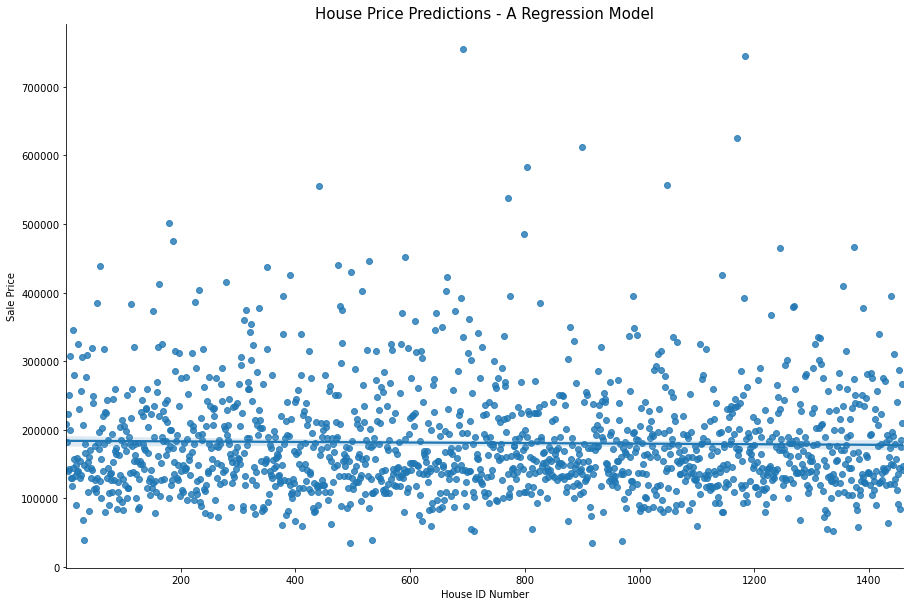

In [28]:
#plotting Graph
fig, ax = plt.subplots(figsize=(15,10))
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = '#000000'
plt.rcParams['axes.labelcolor']= '#000000'
plt.rcParams['xtick.color'] = '#000000'
plt.rcParams['ytick.color'] = '#000000'
plt.rcParams['font.size']=12

sns.despine()
sns.set_style("white")
sns_agelive = sns.regplot(x="Id", y="SalePrice", data=train, ax=ax)
ax.set_title("House Price Predictions - A Regression Model", fontsize=15)
ax.set_ylabel("Sale Price")
ax.set_xlabel("House ID Number")
plt.show()

### Test Dataset

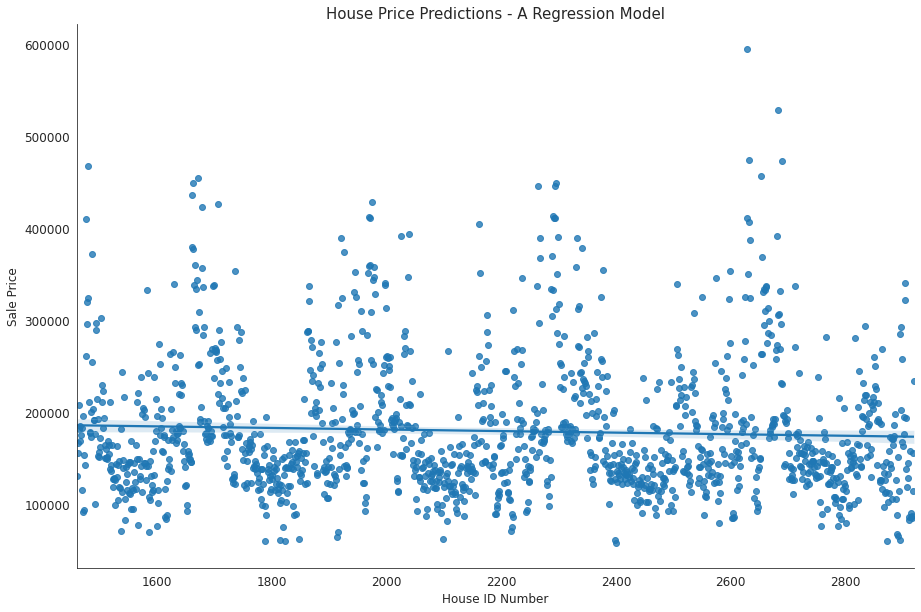

In [29]:
#plotting Graph
fig, ax = plt.subplots(figsize=(15,10))
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = '#000000'
plt.rcParams['axes.labelcolor']= '#000000'
plt.rcParams['xtick.color'] = '#000000'
plt.rcParams['ytick.color'] = '#000000'
plt.rcParams['font.size']=12

sns.despine()
sns.set_style("white")
sns_agelive = sns.regplot(x="Id", y="SalePrice", data=submission, ax=ax)
ax.set_title("House Price Predictions - A Regression Model", fontsize=15)
ax.set_ylabel("Sale Price")
ax.set_xlabel("House ID Number")
plt.show()

## Thank You!
#### Do let me know of any suggestions or critiques you have about this project. 